In [25]:
import os
import sys
import glob
import pickle
sys.path.append('../metanas')

import numpy as np
import pandas as pd

import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from IPython.display import Image, display, Markdown
matplotlib.rcParams['font.serif'] = ['CMU Serif Roman']

In [36]:
def get_experiment_pickle(base_path, path):
    result = []
    path = os.path.join(base_path, path)
    for p in glob.glob(f"{path}/*/experiment.pickle"):
        with (open(p, 'rb')) as f:
            res = pickle.load(f)
            result.append(res)
    
    return result


def mean_std(arr):
    arr = np.array(arr)
    arr = arr * 100
    return np.mean(arr, axis=0), np.std(arr, axis=0)


def plot_accuracy_loss_multiple_seeds(base_path, paths, labels, eval_every,
                                      title="", draw_warm_up=False):
    """Plot all the results in one overview"""

    def plot_line_training(ax, result, indice, label, y_label):
        train_acc = np.array([np.array(m[indice]) for m in result])

        len_epoch = len(np.array(result[0][indice]))
        train_acc_mean = train_acc.mean(axis=0)
        train_acc_std = train_acc.std(axis=0)
        x_axis_meta = np.array(range(train_acc_mean.shape[0]))
        
        ax.plot(x_axis_meta, train_acc_mean, lw = 2, alpha = 1, label=label)
        ax.set_title(f"Meta-training {y_label}")
        ax.fill_between(x_axis_meta, train_acc_mean - train_acc_std,
                        train_acc_mean + train_acc_std, alpha = 0.4)
        ax.set_xlabel("epoch")
        ax.set_ylabel(y_label)
        
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, loc="best")
    
    def plot_line_test(ax, result, indice, label, y_label, eval_every):
        test_spacing = np.linspace(
            eval_every, eval_every*len(result[0][indice]),
            num=len(result[0][indice]), retstep=eval_every,
            dtype=np.int32
        )[0]

        train_acc = np.array([np.array(m[indice]) for m in result])
        len_epoch = len(np.array(result[0][indice]))
        train_acc_mean = train_acc.mean(axis=0)
        train_acc_std = train_acc.std(axis=0)
        
        ax.plot(test_spacing[:len(result[0][indice])],
                train_acc_mean, lw = 2,
                alpha = 1, label=label)
        
        ax.set_title(f"Meta-testing {y_label}")
        ax.fill_between(test_spacing[:len(result[0][indice])],
                        train_acc_mean - train_acc_std,
                        train_acc_mean + train_acc_std, alpha = 0.4)
        ax.set_xlabel("epoch")
        ax.set_ylabel(y_label)
        
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, loc="best")
    
    results = [get_experiment_pickle(base_path, p) for p in paths]
    fig, ax = plt.subplots(2, 2, figsize=(20, 10))
#     plt.suptitle(title, fontsize=14)
    
    
    # ax[0].axvline(x=250, color="gray", linestyle="--", label="End of warm up")
    # ax.axvline(x=250, color="gray", linestyle="--", label="End of warm up")
    y_label = ["acurracy", "loss"]
    if draw_warm_up:
        for i, _ in enumerate(results):
            
            for j, _ in enumerate(["train_test_accu", "train_test_loss"]):
                ax[i,j].axvline(x=250, linestyle="dashed", label="Warm-up phase ends", c='gray')
    
    for i, res in enumerate(results):
        if len(res) == 2:
            print(f"current {i} experiment: {labels[i]}")
#             print([res[0]['test_test_accu'][-1], res[1]['test_test_accu'][-1]])
            print(f"test_test_accu, mean and std: {mean_std([res[0]['test_test_accu'][-1], res[1]['test_test_accu'][-1]])}")
            print(f"train_test_loss, mean and std: {mean_std([res[0]['train_test_loss'][-1], res[1]['train_test_loss'][-1]])}")
        else:
            print(f"Only one sample available for {names[i]}")
            print(f"current {i} experiment: {labels[i]}")
#             print(f"params: {res[0]['test_test_params'][-1]}")
            print(f"test_test_accu, mean and std: {mean_std([res[0]['test_test_accu'][-1]])}")
            print(f"train_test_loss, mean and std: {mean_std([res[0]['train_test_loss'][-1]])}")
        
        
        for j, indice in enumerate(["train_test_accu", "train_test_loss"]):
            plot_line_training(ax[j, 0], res, indice, labels[i], y_label=y_label[j])
        
        for j, indice in enumerate(["test_test_accu", "test_test_loss"]):
            plot_line_test(ax[j, 1], res, indice, labels[i], y_label=y_label[j], eval_every=eval_every[i])

# Ablation plots - Omniglot 1-shot, 20-way
---

In [37]:
# TODO: Add parsing for seperate meta-testing, meta-training
# TODO: Add parsing graphs for MetaNAS + RL (CSV)

# Best ablation components for MetaNAS

---

*Dropout skip-connection, limit skip-connection and alpha regularization*



| 1-shot, 20-way Omniglot  |   |   | 3-shot, 20-way Omniglot  |   |   |
|--------------------------|---|---|--------------------------|---|---|
| **Seed 0**               |   |   | **Seed 0**               |   |   |
| MetaNAS (baseline)       | x |   | MetaNAS (baseline)       | x |   |
| Best ablation            |   | x | Best ablation            |   | x |
| **Seed 1**               |   |   | **Seed 1**               |   |   |
| MetaNAS (baseline)       | x |   | MetaNAS (baseline)       | x |   |
| Best ablation            |   | x | Best ablation            |   | x |


## 1-shot, 20-way Omniglot

current 0 experiment: MetaNAS
test_test_accu, mean and std: (78.46000146567822, 0.900000247359273)
train_test_loss, mean and std: (75.22979692012072, 2.130658145844933)
current 1 experiment: Limit skip-Conn+Dropout Skip-Conn
test_test_accu, mean and std: (80.86000119149685, 1.4199998348951297)
train_test_loss, mean and std: (77.0130635714531, 0.1815992662310677)
current 2 experiment: Limit skip-Conn+Dropout Skip-Conn+Alpha Reg+Cos Ann
test_test_accu, mean and std: (81.62000126838684, 0.21999993324280354)
train_test_loss, mean and std: (103.04697184294463, 3.6296925148367833)


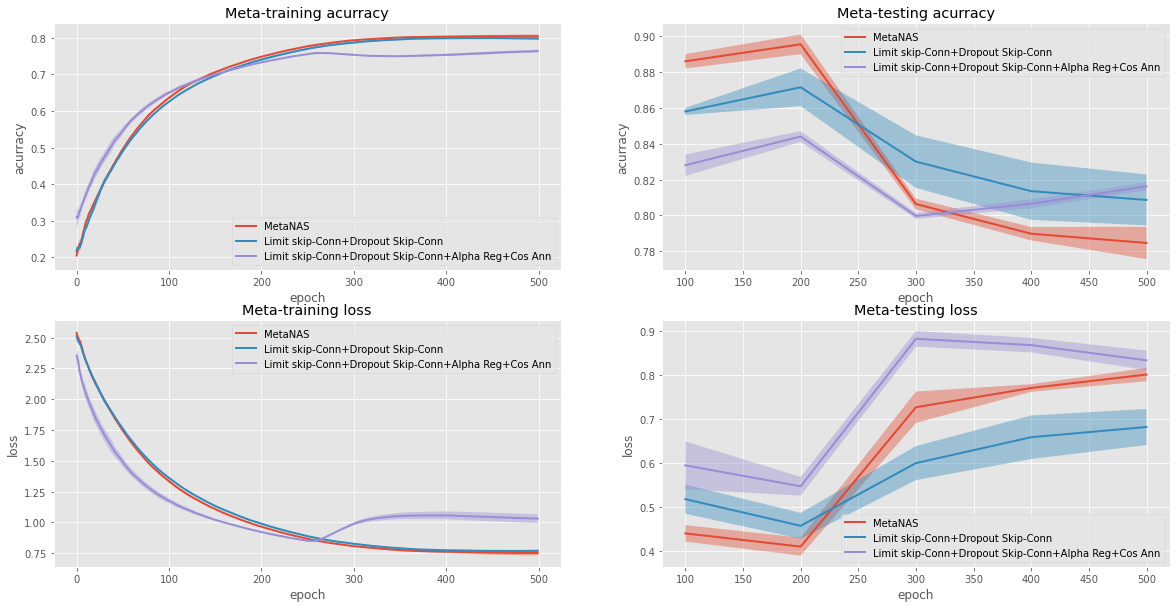

In [38]:
# 1-shot, 20-way Omniglot
base_path = "/home/rob/Desktop/results/ablation"

paths = [
    "omniglot_train_metanas_w_param",
    "omniglot_train_dropout_limit_sk", 
    "omniglot_train_alpha_power_cos_dropout_limit_sk_n1",
]

names = [
    "MetaNAS",
    "Limit skip-Conn+Dropout Skip-Conn",
    "Limit skip-Conn+Dropout Skip-Conn+Alpha Reg+Cos Ann",
]

plot_accuracy_loss_multiple_seeds(
    base_path, paths, names, eval_every=[100, 100, 100, 100, 100, 100],
    title="Baseline comparison, n=1, k=20, Omniglot dataset")

## 3-shot, 20-way Omniglot

current 0 experiment: MetaNAS
test_test_accu, mean and std: (88.7000009059906, 0.8600001811981244)
train_test_loss, mean and std: (82.86512501761317, 8.3610136140883)
current 1 experiment: Dropout+limit SK
test_test_accu, mean and std: (91.54000053405761, 0.8199998617172284)
train_test_loss, mean and std: (76.34598605126143, 0.41945055156946154)
current 2 experiment: Dropout+Limit SK+AlphaReg+PowerCosineAnnealing
test_test_accu, mean and std: (89.94000104665756, 0.34000011682510234)
train_test_loss, mean and std: (102.32611829698087, 4.001725775897505)


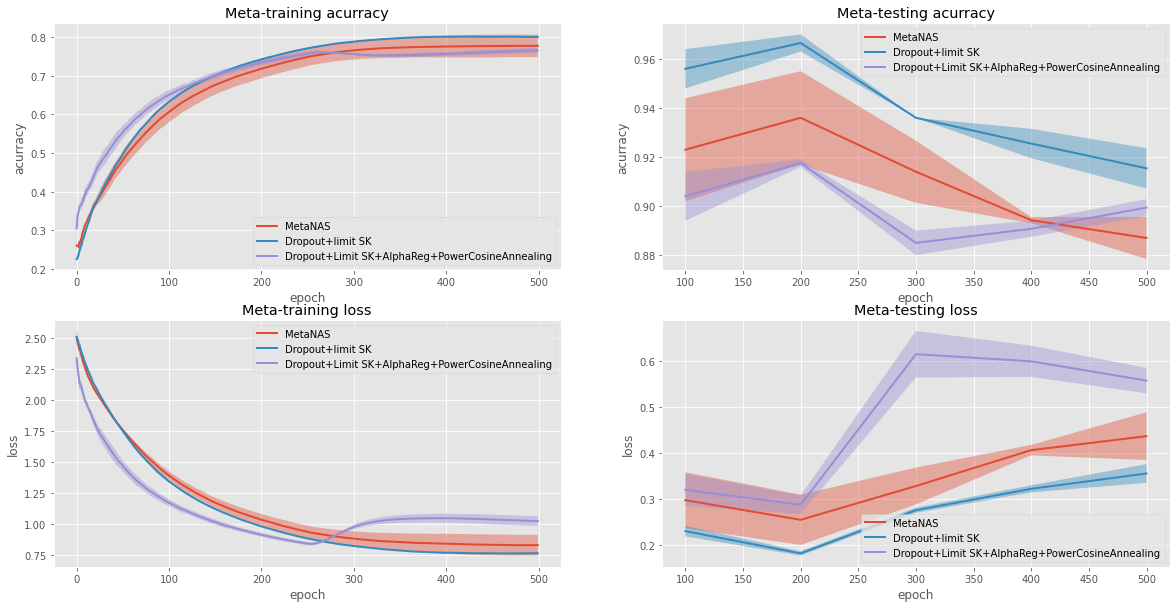

In [39]:
# 3-shot, 20-way Omniglot
base_path = "/home/rob/Desktop/results/baseline"

paths = [
    "omniglot_train_metanas_n3",
    "omniglot_train_dropout_limit_sk_n3",
    "omniglot_train_alpha_power_cos_dropout_limit_sk_n3",
]

names = [
    "MetaNAS",
    "Dropout+limit SK",
    "Dropout+Limit SK+AlphaReg+PowerCosineAnnealing",
]

plot_accuracy_loss_multiple_seeds(base_path, paths, names, eval_every=[100, 100, 100],
                   title="Baseline comparison, n=3, k=20, Omniglot dataset")

| 3-shot, 20-way TripleMNIST  |   |   |
|-----------------------------|---|---|
| **Seed 0**                  |   |   |
| MetaNAS (baseline)          | x |   |
| Best ablation               |   | x |
| **Seed 1**                  |   |   |
| MetaNAS (baseline)          | - |   |
| Best ablation               |   | x |

## 3-shot, 20-way TripleMNIST

current 0 experiment: MetaNAS
test_test_accu, mean and std: (90.9400006532669, 0.3399999380111751)
train_test_loss, mean and std: (71.13974192664028, 1.0914027979969987)
current 1 experiment: limit and dropout SK
test_test_accu, mean and std: (93.72000052928925, 0.5599999666213975)
train_test_loss, mean and std: (69.4033592743054, 0.17306160423905226)
current 2 experiment: limit, dropout SK, alpha reg, cos
test_test_accu, mean and std: (92.38000071048737, 0.6599999666213989)
train_test_loss, mean and std: (90.30666771657765, 5.775074020698668)


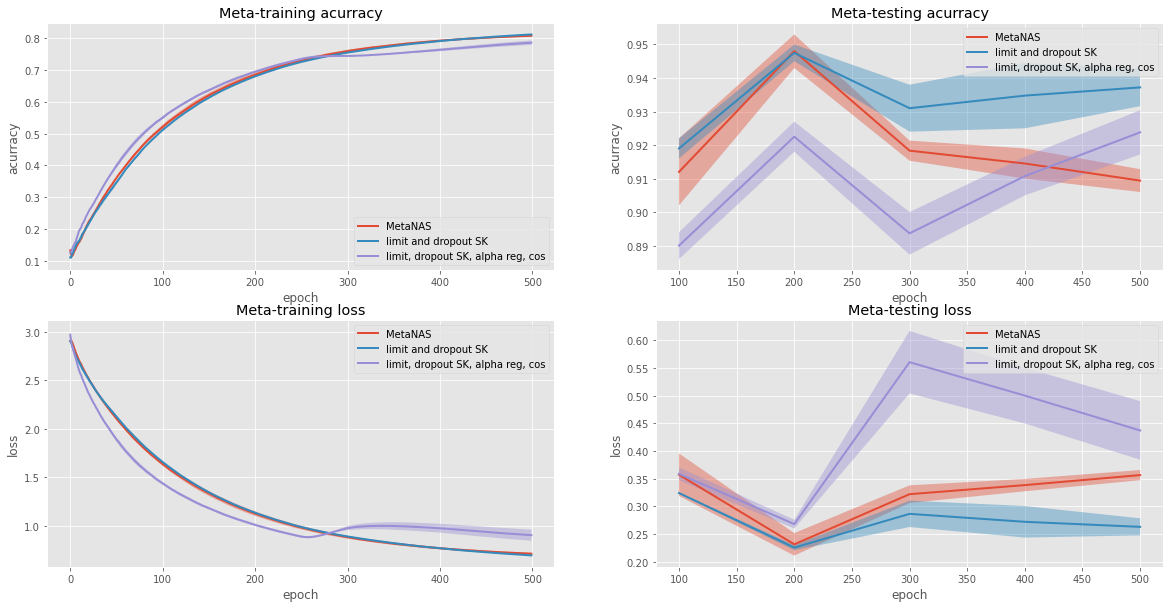

In [42]:
# 3-shot, 20-way TripleMNIST
base_path = "/home/rob/Desktop/results/baseline"

paths = [
    "triplemnist_train_metanas_n3",
    "triplemnist_train_dropout_limit_sk_n3",
    "triplemnist_train_dropout_limit_sk_alpha_reg_cos_n3"
]

names = [
    "MetaNAS",
    "limit and dropout SK",
    "limit, dropout SK, alpha reg, cos"
]

plot_accuracy_loss_multiple_seeds(base_path, paths, names, eval_every=[100, 100, 100],
                   title="Baseline comparison, n=3, k=20, TripleMNIST dataset")

## MetaNAS + RL

---

| 1-shot, 20-way Omniglot                 |   |   |
|-----------------------------------------|---|---|
| **Seed 0**                              |   |   |
| MetaNAS (baseline)                      | - |   |
| Best ablation                           |   | - |
| **Seed 1**                              |   |   |
| MetaNAS (baseline)                      | - |   |
| Best ablation                           |   | - |


In [ ]:
base_path = "/home/rob/Git/meta-fsl-nas/metanas/results/agent/"

paths = [
    "triplemnist_metanas_ppo_agent_metad2a"
]

names = [
    "MetaNAS+RL agent"]



plot_accuracy_loss_multiple_seeds(base_path, paths, names, eval_every=[5],
                   title="MetaNAS+RL agent, n=1, k=20, TripleMNIST dataset")